In [24]:
import pandas as pd
import csv
import os
import numpy as np
from sklearn.svm import SVC 
from matplotlib import style
import matplotlib.pyplot as plt
from sklearn import preprocessing
style.use("ggplot")


In [25]:
csv_path = os.path.join('Real_Data - Sheet.csv')
cc_df = pd.read_csv(csv_path)
cc_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,y
0,5500,1,2,1,33,-1,-1,-1,-1,-1,...,482,112,252,417,570,987,482,112,252,0
1,10000,1,2,1,33,9,9,9,8,7,...,5000,8700,8900,800,3000,200,1000,3700,200,0
2,5400,1,2,1,33,8,7,6,5,4,...,4382,3792,3367,2000,200,200,200,100,100,0
3,15000,1,2,1,32,9,9,8,7,6,...,2759,2900,3100,1800,700,100,159,500,200,0
4,2050,1,2,1,31,-1,-1,-1,-1,-1,...,294,14,88,132,126,352,294,14,88,1


In [56]:
X = np.column_stack((cc_df.X8,cc_df.X9))

y  = np.array((cc_df.y))


X = preprocessing.scale(X)

X

/Users/pooja/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


array([[-0.90965409, -0.75353446],
       [ 1.73982383,  1.99584803],
       [ 0.94498046,  1.0793872 ],
       [ 1.47487604,  1.69036109],
       [-0.90965409, -0.75353446],
       [ 0.94498046,  1.0793872 ],
       [ 1.20992825,  1.38487415],
       [ 1.20992825,  1.38487415],
       [ 1.20992825,  1.38487415],
       [ 1.20992825,  1.38487415],
       [-0.90965409, -0.75353446],
       [-0.90965409, -0.75353446],
       [-0.90965409, -0.75353446],
       [-0.90965409, -0.75353446],
       [-0.90965409, -0.75353446],
       [-0.90965409, -0.75353446],
       [-0.90965409, -0.75353446],
       [-0.90965409, -0.75353446],
       [-0.90965409, -0.75353446],
       [-0.90965409, -0.75353446],
       [ 0.41508487, -0.44804752],
       [ 0.94498046,  1.0793872 ],
       [-0.90965409, -0.44804752],
       [-0.64470629, -0.14256057],
       [ 0.94498046, -0.75353446],
       [-0.90965409, -0.75353446],
       [-0.11481071, -0.75353446],
       [-0.90965409, -0.75353446],
       [ 0.94498046,

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1, stratify=y)

In [58]:
from sklearn.svm import SVC 
# from sklearn.svm import SVC 
from matplotlib import style
style.use("ggplot")
model = SVC(kernel='linear')
# model.fit(X, y)
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [59]:
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.750


In [60]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

/Users/pooja/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


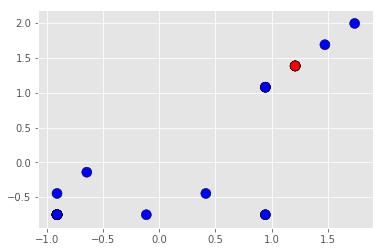

In [61]:
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
plt.show()